<a href="https://colab.research.google.com/github/VoHuynhDuyThanh/AI/blob/main/CNNFashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
(train_X, train_Y), (test_X, test_Y ) = fashion_mnist.load_data()

In [ ]:
test_X.shape

(10000, 28, 28)

Text(0.5, 1.0, 'So: 8')

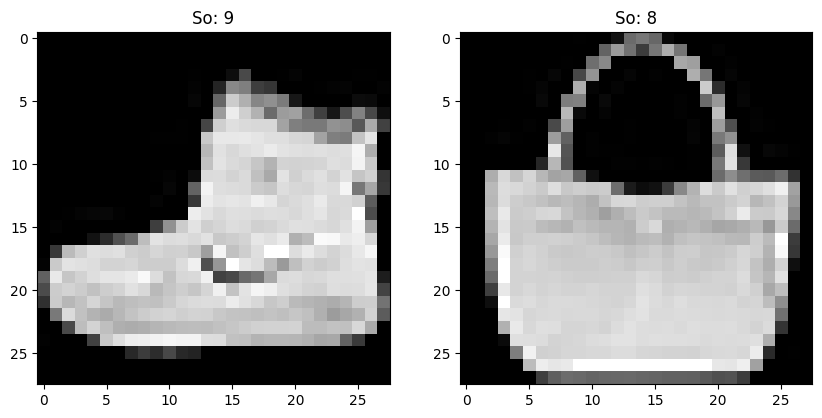

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = [10,10])
plt.subplot(121)
plt.imshow(train_X[0], cmap='gray')
plt.title('So: {}'.format(train_Y[0]))
plt.subplot(122)
plt.imshow(train_X[100], cmap='gray')
plt.title('So: {}'.format(train_Y[100]))

In [ ]:
train_X = train_X.reshape((60000, 28, 28, 1))
test_X = test_X.reshape((10000, 28, 28, 1))
train_X.shape, test_X.shape
train_X = train_X.astype('float32')
train_X = train_X/255
test_X = test_X.astype('float32')
test_X = test_X/255

In [ ]:
from keras.utils import to_categorical
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 20
classes = 10

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape=(28,28,1), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))

#Compile:
model.compile( loss =loss.categorical_crossentropy ,optimizer= "adam", metrics= ['accuracy'])
model.summary()
train = model.fit(train_X, train_Y, batch_size= batch_size, epochs= epochs, verbose= 1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_23 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

Test loss: 0.46385371685028076
Test accunacy 0.9208999872207642


Text(0.5, 1.0, 'Training & Testing Accuracy')

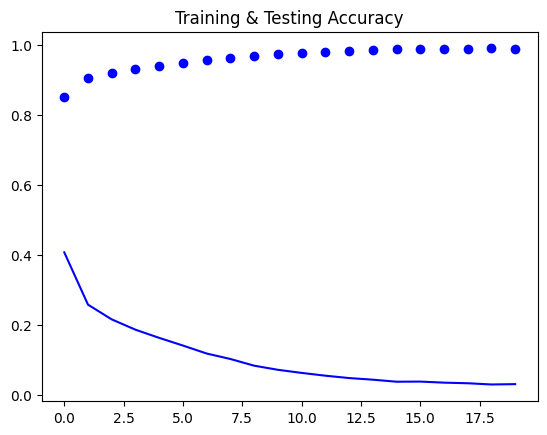

In [ ]:
eval = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')